1. Create the following data set for two independent variable (X1,X2) and one dependent variable (Y) inCSV. Apply the Logistic Regression to perform the following.
a. Calculate the coefficients (B0, B1 and B2).
b. Apply the sigmoid function to get the prediction and calculate error.
c. From the predicted values calculate the accuracy.
d. List the model parameters along with error for every instance of the training
data. e. Plot the graph of B1 v/s error and B2 v/s error.
f. Use scikit learn model to repeat the above steps and compare the results.

In [189]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [190]:
data=pd.read_csv('data.csv')

In [191]:
X1=data['X1']
X2=data['X2']
Y=data['Y']

In [192]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [193]:
b0=0
b1=0
b2=0
lrate=0.05

In [194]:
predictions = []
errors = []
b2_values=[]
b1_values=[]
for y,x1,x2 in zip(Y,X1,X2):
    z=b0+b1*x1+b2*x2
    prediction=sigmoid(z)
    error=y-prediction
    b2_values.append(b2)
    b1_values.append(b1)
    predictions.append(prediction)
    errors.append(error)
    b0=b0+lrate*error*prediction*(1-prediction)
    b1=b1+lrate*error*prediction*(1-prediction)*x1
    b2=b2+lrate*error*prediction*(1-prediction)*x2
    

In [195]:
predictions = []
for y,x1,x2 in zip(Y,X1,X2):
    prediction = sigmoid(b0 + b1 * x1 + b2 * x2)
    predictions.append(prediction)


In [196]:
predictions = [1 if prediction >= 0.5 else 0 for prediction in predictions]
accuracy_score(Y, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5


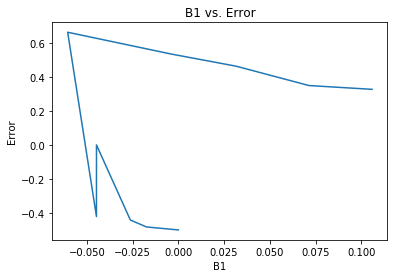

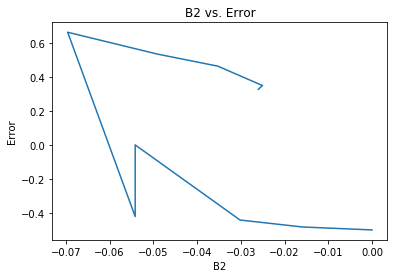

In [197]:
plt.figure()
plt.plot(b1_values, errors)
plt.xlabel("B1")
plt.ylabel("Error")
plt.title("B1 vs. Error")


plt.figure()
plt.plot(b2_values, errors)
plt.xlabel("B2")
plt.ylabel("Error")
plt.title("B2 vs. Error")
plt.show()

In [198]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
data = pd.read_csv('data.csv')

X = data[['X1', 'X2']]
Y = data['Y']

model = LogisticRegression()

model.fit(X, Y)

B0 = model.intercept_[0]
B1, B2 = model.coef_[0]

predictions = model.predict(X)

accuracy = accuracy_score(Y, predictions)
print("Accuracy:", accuracy)



Accuracy: 1.0


2. Use above data set for one independent variable (X=X1) and one dependent variable (Y) in CSV.
Applying Logistic Regression, explore the relationship between independent and dependent variables.
a. Calculate the coefficients (B0, and B1).
b. Apply the sigmoid function to get the prediction and calculate error.
c. From the predicted values calculate the accuracy.
d. List the model parameters along with error for every instance of the training data.
e. Plot the graph of B1 v/s error.
f. Visualize the following binary cross entropy function for logistic regression using the above training data
Plot y=1 and y=0 cases separately, and then plot the combined graph by considering X in X-axis and cost in
Y-axis.
g. Use scikit learn model to repeat the above steps and compare the results.

In [199]:
b0=0
b1=0
lrate=0.05
predictions = []
errors = []
b1_values=[]
for y,x1,x2 in zip(Y,X1,X2):
    z=b0+b1*x1
    prediction=sigmoid(z)
    error=y-prediction
    b1_values.append(b1)
    predictions.append(prediction)
    errors.append(error)
    b0=b0+lrate*error*prediction*(1-prediction)
    b1=b1+lrate*error*prediction*(1-prediction)*x1

In [200]:
predictions = []
for y,x1,x2 in zip(Y,X1,X2):
    prediction = sigmoid(b0 + b1 * x1 )
    predictions.append(prediction)

predictions = [1 if prediction >= 0.5 else 0 for prediction in predictions]
accuracy = accuracy_score(Y, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5


Text(0.5,1,'B1 vs. Error')

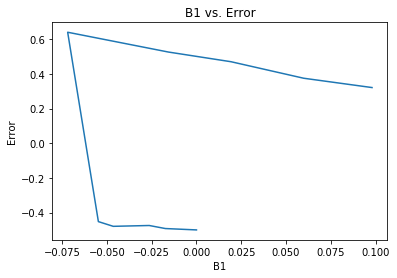

In [201]:
plt.figure()
plt.plot(b1_values, errors)
plt.xlabel("B1")
plt.ylabel("Error")
plt.title("B1 vs. Error")

3. Use the above data set for two independent variable (X1,X2) and one dependent variable (Y) in CSV.
Apply the Logistic Regression with SGD to perform the following.
a. Calculate the coefficients (B0, B1 and B2) and arrive at different values of B0, B1, B2, and error for 50
iterations of 5 epochs.
b. Apply the sigmoid function to get the prediction and calculate error.
c. From the predicted values calculate the accuracy.
d. Plot the graph of epoch (X-axis) v/s Accuracy (Y-axis).
f. Use scikit learn model to repeat the above steps and compare the results.

In [202]:
b0=0
b1=0
b2=0
lrate=0.1
Y

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    1
9    1
Name: Y, dtype: int64

In [203]:
accuracy_values=[]
epoc=np.arange(5)
for epocs in epoc:
    for y,x1,x2 in zip(Y,X1,X2):
        z=b0+b1*x1+b2*x2
        prediction=sigmoid(z)
        error=y-prediction
        b0=b0+lrate*error*prediction*(1-prediction)
        b1=b1+lrate*error*prediction*(1-prediction)*x1
        b2=b2+lrate*error*prediction*(1-prediction)*x2
    predictions = []
    for y,x1,x2 in zip(Y,X1,X2):
        prediction = sigmoid(b0 + b1 * x1 )
        predictions.append(prediction)    
    predictions =[1 if prediction >= 0.5 else 0 for prediction in predictions]
    
    accuracy = accuracy_score(Y, predictions)
    accuracy_values.append(accuracy)

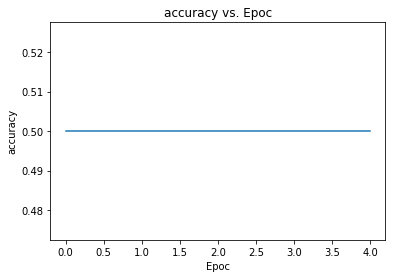

In [204]:
plt.figure()
plt.plot(epoc,accuracy_values)
plt.ylabel("accuracy")
plt.xlabel("Epoc")
plt.title("accuracy vs. Epoc")
plt.show()